# Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
import pandas as pd

base_load = '/content/drive/MyDrive/image_recognition/data/image_data/pickle'

img_u1 = pd.read_pickle(base_load + '/결막염/결막염_images_유224.pickle')
img_u2 = pd.read_pickle(base_load + '/궤양성각막질환/궤양성각막질환_images_하224.pickle')
img_u3 = pd.read_pickle(base_load + '/백내장/백내장_images_성숙224.pickle')
img_u4 = pd.read_pickle(base_load + '/비궤양성각막질환/비궤양성각막질환_images_하224.pickle')
img_u5 = pd.read_pickle(base_load + '/핵경화/핵경화_images_유224.pickle')

img_m1 = pd.read_pickle(base_load + '/결막염/결막염_images_무224.pickle')
img_m2 = pd.read_pickle(base_load + '/궤양성각막질환/궤양성각막질환_images_무224.pickle')
img_m3 = pd.read_pickle(base_load + '/백내장/백내장_images_무224.pickle')
img_m4 = pd.read_pickle(base_load + '/비궤양성각막질환/비궤양성각막질환_images_무224.pickle')
img_m5 = pd.read_pickle(base_load + '/핵경화/핵경화_images_무224.pickle')


print(img_u1.shape, img_u2.shape, img_u3.shape, img_u4.shape, img_u5.shape) 
print(img_m1.shape, img_m2.shape, img_m3.shape, img_m4.shape, img_m5.shape)

(9598, 224, 224, 3) (6880, 224, 224, 3) (6885, 224, 224, 3) (4833, 224, 224, 3) (9600, 224, 224, 3)
(9600, 224, 224, 3) (6879, 224, 224, 3) (6879, 224, 224, 3) (4800, 224, 224, 3) (9599, 224, 224, 3)


In [ ]:
# concat
import numpy as np

gm_imgs = np.concatenate((img_u1,img_m1))
gy_imgs = np.concatenate((img_u2,img_m2))
bn_imgs = np.concatenate((img_u3,img_m3))
by_imgs = np.concatenate((img_u4,img_m4))
hg_imgs = np.concatenate((img_u5,img_m5))

print(gm_imgs.shape, gy_imgs.shape, bn_imgs.shape, by_imgs.shape, hg_imgs.shape)

(19198, 224, 224, 3) (13759, 224, 224, 3) (13764, 224, 224, 3) (9633, 224, 224, 3) (19199, 224, 224, 3)


In [ ]:
# label
gm_label = np.concatenate((np.full(9598, 1),np.full(9600, 0)))
gy_label = np.concatenate((np.full(6880, 1),np.full(6879, 0)))
bn_label = np.concatenate((np.full(6885, 1),np.full(6879, 0)))
by_label = np.concatenate((np.full(4833, 1),np.full(4800, 0)))
hg_label = np.concatenate((np.full(9600, 1),np.full(9599, 0)))

print(gm_label.shape, gy_label.shape, bn_label.shape, by_label.shape, hg_label.shape)

(19198,) (13759,) (13764,) (9633,) (19199,)


In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split
gm_train_images, gm_test_images, gm_train_labels, gm_test_labels = train_test_split(gm_imgs, gm_label,stratify = gm_label , test_size=0.3)
gy_train_images, gy_test_images, gy_train_labels, gy_test_labels = train_test_split(gy_imgs, gy_label,stratify = gy_label , test_size=0.3)
bn_train_images, bn_test_images, bn_train_labels, bn_test_labels = train_test_split(bn_imgs, bn_label,stratify = bn_label , test_size=0.3)
by_train_images, by_test_images, by_train_labels, by_test_labels = train_test_split(by_imgs, by_label,stratify = by_label , test_size=0.3)
hg_train_images, hg_test_images, hg_train_labels, hg_test_labels = train_test_split(hg_imgs, hg_label,stratify = hg_label , test_size=0.3)

In [ ]:
# print(gm_train_images.shape, gm_test_images.shape)

# 결막염


In [ ]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt

In [ ]:
gm_train_images.shape, gm_train_labels.shape, gm_test_images.shape, gm_test_labels.shape

((13438, 224, 224, 3), (13438,), (5760, 224, 224, 3), (5760,))

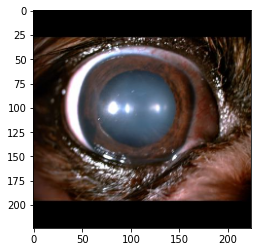

In [ ]:
import cv2
plt.imshow(cv2.cvtColor(gm_train_images[3], cv2.COLOR_BGR2RGB))

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50


## 일부 재학습 모델
base_model_50 = ResNet50(include_top=False, input_shape = (224,224 ,3), weights = 'imagenet')

base_model_50.trainable = False	

for layer in base_model_50.layers[:-10]:
    layer.trainable = False		

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model_50(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model_50.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
s_model_res50 = tf.keras.Model(inputs, outputs)

In [ ]:
s_model_res50.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
gm_history = s_model_res50.fit(gm_train_images, gm_train_labels, epochs = 5, validation_data=(gm_test_images, gm_test_labels),  batch_size= 32)

Epoch 1/5
  4/420 [..............................] - ETA: 13:14 - loss: 31.4720 - accuracy: 0.6719

KeyboardInterrupt: ignored

In [ ]:
# s_model_res50.evaluate(gm_test_images, gm_test_labels)

# 궤양성각막질환


In [ ]:
s_model_res50.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
gy_history = s_model_res50.fit(gy_train_images, gy_train_labels, epochs = 5, validation_data=(gy_test_images, gy_test_labels),  batch_size= 32)

Epoch 1/5
  1/301 [..............................] - ETA: 30:19 - loss: 99.8145 - accuracy: 0.5000

KeyboardInterrupt: ignored

In [ ]:
# s_model_res50.evaluate(gy_test_images, gy_test_labels)

# 백내장


In [ ]:
s_model_res50.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
bn_history = s_model_res50.fit(bn_train_images, bn_train_labels, epochs = 5, validation_data=(bn_test_images, bn_test_labels),  batch_size= 32)

Epoch 1/5
  2/302 [..............................] - ETA: 10:35 - loss: 28.4941 - accuracy: 0.6250

KeyboardInterrupt: ignored

In [ ]:
# s_model_res50.evaluate(bn_test_images, bn_test_labels)

# 비궤양성각막질환


In [ ]:
s_model_res50.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
by_history = s_model_res50.fit(by_train_images, by_train_labels, epochs = 5, validation_data=(by_test_images, by_test_labels),  batch_size= 32)

Epoch 1/5


KeyboardInterrupt: ignored

In [ ]:
# s_model_res101.evaluate(by_test_images, by_test_labels)

# 핵경화


In [ ]:
s_model_res50.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
hg_history = s_model_res50.fit(hg_train_images, hg_train_labels, epochs = 5, validation_data=(hg_test_images, hg_test_labels),  batch_size= 32)

Epoch 1/5


KeyboardInterrupt: ignored

In [ ]:
# s_model_res50.evaluate(hg_test_images, hg_test_labels)